In [8]:
import pandas as pd

df = pd.read_csv("S05-hw-dataset.csv")

df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [9]:
# размер датасета
df.shape

(3000, 17)

Датасет содержит 3000 объектов и 17 столбцов

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

Все признаки числовые, пропусков нет

In [11]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [12]:
# распределение целевой переменной
print(df['default'].value_counts(normalize=True))

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


Целевая переменная распределна как 0.589667% и 0.410333%

In [13]:
# подготовка признаков
df = df.drop(columns=['client_id'])  # технический id, который не влияет на модель, удаляем
y = df['default']  # целевая переменная
X = df.drop(columns=['default'])  # признаки
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3000, 15)
y shape: (3000,)


матрица признаков содержит 15 числовых переменных, целевой вектор извлечен из столбца default

In [14]:
# разделение данных
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    stratify=y,
    random_state=42  # чтобы разбиение было одинаковым
)
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])
print("\nTrain class balance:")
print(y_train.value_counts(normalize=True))
print("\nTest class balance:")
print(y_test.value_counts(normalize=True))

Train size: 2400
Test size: 600

Train class balance:
default
0    0.589583
1    0.410417
Name: proportion, dtype: float64

Test class balance:
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [15]:
# создание модели
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

dummy = DummyClassifier(strategy="most_frequent")  # самый частый класс
dummy.fit(X_train, y_train)  # Обучаем

y_pred_dummy = dummy.predict(X_test)   # предсказания
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)  # метрики
print(f"  Accuracy: {acc_dummy:.4f}")  # доля самого чатсого класса
print(f"  ROC-AUC:  {auc_dummy:.4f}")  # уровень угадывания

  Accuracy: 0.5900
  ROC-AUC:  0.5000


Безлайн-модель достигла Accuracy: 0.5900 и ROC-AUC:  0.5000, что соответсвует случайному ранжированию. Эта модель как точка отсчета для других моделей, они должны превосходить её

In [16]:
# логистическая регрессия
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# делаем pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),  # нормализация признаков
    ("logreg", LogisticRegression(max_iter=1000))  # модель
])

# обучаем
pipe.fit(X_train, y_train)
y_pred_lr = pipe.predict(X_test)
y_proba_lr = pipe.predict_proba(X_test)[:, 1]  # предсказания

acc_lr = accuracy_score(y_test, y_pred_lr)  # метрики
auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"  Accuracy: {acc_lr:.4f}")
print(f"  ROC-AUC:  {auc_lr:.4f}")

  Accuracy: 0.8000
  ROC-AUC:  0.8756


Метрики подтверждают высокое качество предсказаний

In [17]:
# гиперпараметр
from sklearn.model_selection import GridSearchCV

# сетка значений для параметра
param = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(
    pipe, 
    param,
    cv=5,
    scoring="roc_auc",
)
# поиск
grid_search.fit(X_train, y_train)
print("Лучшее значение C:", grid_search.best_params_["logreg__C"])
print("Лучший ROC-AUC на CV:", round(grid_search.best_score_, 4))

Лучшее значение C: 100.0
Лучший ROC-AUC на CV: 0.8607


In [18]:
# оценка на тестовых данных
best_logreg = grid_search.best_estimator_

y_pred_best = best_logreg.predict(X_test)  # предсказания на тесте
y_proba_best = best_logreg.predict_proba(X_test)[:, 1]

acc_best = accuracy_score(y_test, y_pred_best)  # метрики
auc_best = roc_auc_score(y_test, y_proba_best)

print(f"Лучшая логистическая регрессия (C={grid_search.best_params_['logreg__C']}):")
print(f"  Accuracy на тесте: {acc_best:.4f}")
print(f"  ROC-AUC на тесте:  {auc_best:.4f}")

Лучшая логистическая регрессия (C=100.0):
  Accuracy на тесте: 0.8017
  ROC-AUC на тесте:  0.8756


In [19]:
# сравнение моделей в виде таблицы
res = pd.DataFrame({
    "Модель": ["DummyClassifier (most_frequent)", "LogisticRegression (C=100.0)"],
    "Accuracy": [0.5900, acc_best],
    "ROC-AUC": [0.5000, auc_best]
})
res

,Модель,Accuracy,ROC-AUC
0,DummyClassifier (most_frequent),0.590000,0.500000
1,LogisticRegression (C=100.0),0.801667,0.875649


Безлайн-модель предсказывает самый частый класс через случайный уровень ранжирования, достигая accuracy = 0.5900 и ROC-AUC = 0.5000.

Логистическая регрессия превосходит безлайн: accuracy = 0.801667, roc-auc = 0.875649, что говорит о хороших способностях разделять клиентов по категориям.

Лучшее качество достигается при C = 100.0 (минимальная регуляризация), значит признаки в датасете не вызывают переобучения даже без больших штрафов.

Логистическая регрессия является разумным выбором для этой задачи: она проста и эффективна по сравнению с наивным подходом, обеспечивает высокое качество предсказания.


### Дополнительно ###

<Figure size 800x600 with 0 Axes>

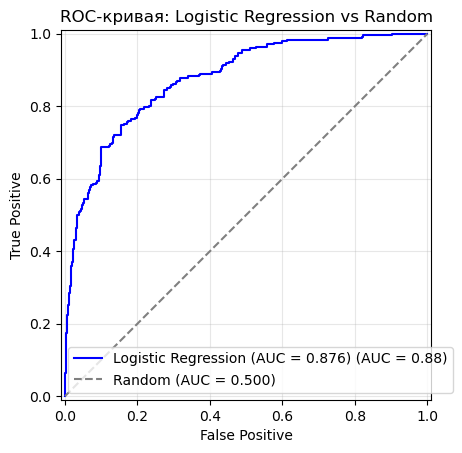

In [20]:
# построение roc-кривой
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import os
os.makedirs("figures", exist_ok=True)

plt.figure(figsize=(8, 6))
# кривая для логистической регрессии
RocCurveDisplay.from_estimator(
    best_logreg, X_test, y_test,
    name=f"Logistic Regression (AUC = {auc_best:.3f})",
    color="blue"
)
# кривая для безлайна
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random (AUC = 0.500)")

plt.title("ROC-кривая: Logistic Regression vs Random")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.grid(alpha=0.3)

plt.savefig("figures/roc.png", dpi=150, bbox_inches="tight")
plt.show()

  Precision: 0.7953
  Recall:    0.6951
  F1-score:  0.7419
  Average Precision (AP): 0.8398


<Figure size 800x600 with 0 Axes>

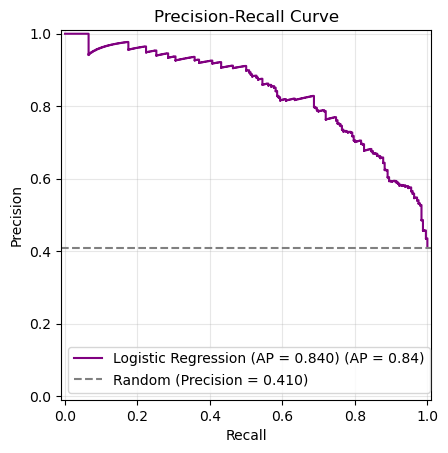

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, PrecisionRecallDisplay, average_precision_score

# доп метрики 
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
avg_precision = average_precision_score(y_test, y_proba_best)

print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  Average Precision (AP): {avg_precision:.4f}")

# pr-кривая
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_predictions(
    y_test, y_proba_best,
    name=f"Logistic Regression (AP = {avg_precision:.3f})",
    color="purple"
)

# случайная модель
baseline = y_test.mean()
plt.axhline(y=baseline, color="gray", linestyle="--", label=f"Random (Precision = {baseline:.3f})")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(alpha=0.3)

plt.savefig("figures/pr.png", dpi=150, bbox_inches="tight")
plt.show()

Для задачи PR-кривая является более информативной метрикой, чем ROC-AUC, так как фокусируется на качестве предсказаний положительного класса. Логистическая регрессия показала Average Precision = 0.840, что превышает случайный уровень (0.410). Это значит, что модель эффективно выделяет дефолтных клиентов даже при высоких значениях recall. 


In [22]:
from sklearn.ensemble import RandomForestClassifier

# forest
rf = RandomForestClassifier(
    n_estimators=100,      # количество деревьев
    max_depth=5,           # ограничение глубины
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)  # предсказания
y_proba_rf = rf.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)  # метрики
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest:")
print(f"  Accuracy: {acc_rf:.4f}")
print(f"  ROC-AUC:  {auc_rf:.4f}")

Random Forest:
  Accuracy: 0.7833
  ROC-AUC:  0.8433


In [23]:
# новая таблица сравнений
results = pd.DataFrame({
    "Модель": [
        "DummyClassifier (most_frequent)",
        "LogisticRegression (C=100.0)",
        "RandomForest (n_estimators=100)"
    ],
    "Accuracy": [0.5900, acc_best, acc_rf],
    "ROC-AUC": [0.5000, auc_best, auc_rf]
})

results

,Модель,Accuracy,ROC-AUC
0,DummyClassifier (most_frequent),0.590000,0.500000
1,LogisticRegression (C=100.0),0.801667,0.875649
2,RandomForest (n_estimators=100),0.783333,0.843266


<Figure size 900x700 with 0 Axes>

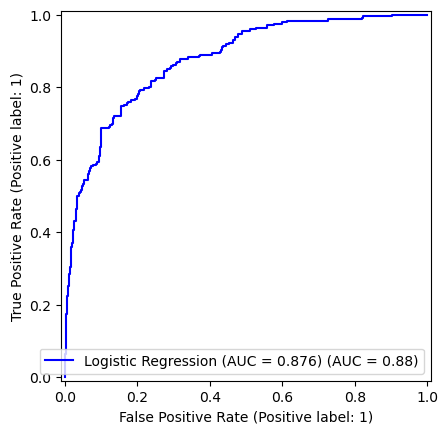

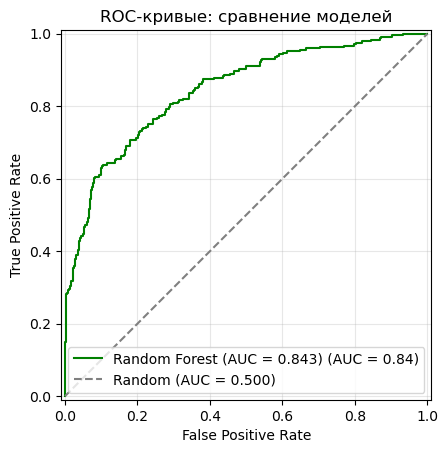

In [24]:
plt.figure(figsize=(9, 7))

# логстическая регрессия
RocCurveDisplay.from_estimator(
    best_logreg, X_test, y_test,
    name=f"Logistic Regression (AUC = {auc_best:.3f})",
    color="blue"
)

# forest
RocCurveDisplay.from_estimator(
    rf, X_test, y_test,
    name=f"Random Forest (AUC = {auc_rf:.3f})",
    color="green"
)

# случайная модель
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random (AUC = 0.500)")

plt.title("ROC-кривые: сравнение моделей")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("figures/roc_comparison.png", dpi=150, bbox_inches="tight")
plt.show()

## Итоговые выводы ##

В качестве бейзлайна использовался DummyClassifier (most_frequent), который на тестовой выборке показал accuracy около 0.59 и ROC-AUC примерно 0.50.  
Логистическая регрессия с подобранным параметром C=100.0 дала accuracy ≈ 0.80 и ROC-AUC ≈ 0.88, что заметно лучше бейзлайна.

Разница в accuracy составляет примерно +0.21, а ROC-AUC вырос с 0.50 до 0.88, то есть модель стала существенно лучше различать классы.  

При увеличении C качество сначала росло, а затем стабилизировалось.  

Таким образом, логистическая регрессия существенно превосходит DummyClassifier и является разумной базовой моделью для задачи предсказания дефолта на этом датасете.  
